<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/Copie_de_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie 1 : Librairies et Données

In [69]:
import numpy
print(numpy.__version__)

import scipy
print(scipy.__version__)

import gensim
print(gensim.__version__)

#from gensim import corpora

1.26.4
1.13.1
4.3.3


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime,date,timedelta
import datetime as dt
import time
from wordcloud import WordCloud # Visualisation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import words
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
from transformers import AutoTokenizer, DistilBertModel
import torch
import os
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
import mlflow
from mlflow.models import infer_signature

In [71]:
df=pd.read_csv('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/Requete principaleP5.csv', sep=',')
df.head()

Title  \
0  How do I delete a Git branch locally and remot...   
1  Find all files containing a specific text (str...   
2  How do I force "git pull" to overwrite local f...   
3  How do I check if a string contains a specific...   
4                    Renaming column names in Pandas   

                                                Body  \
0  <p>Failed Attempts to Delete a Remote Branch:<...   
1  <p>How do I find all files containing a specif...   
2  <p>How do I force an overwrite of local files ...   
3  <p>Consider:</p>\n\n<pre><code>$a = 'How are y...   
4  <p>I want to change the column labels of a Pan...   

                                                Tags        Id  Score  \
0  <git><version-control><git-branch><git-push><g...   2003505  20378   
1               <linux><text><grep><directory><find>  16956810   7501   
2  <git><version-control><overwrite><git-pull><gi...   1125968   9662   
3  <php><string><substring><contains><string-matc...   4366730   2655   
4       <python><pandas><replace><dataframe><rename>  11346283   2974   

   ViewCount  FavoriteCount  AnswerCount  
0   11525076            0.0           41  
1   11034477            0.0           56  
2    8559695            0.0           54  
3    6713692            0.0           36  
4    6485201            0.0           33

# Partie 2 : Exploratory Data Analysis

In [72]:
print(df.shape)

(50000, 8)


In [73]:
df.isnull().sum()

Title               0
Body                0
Tags                0
Id                  0
Score               0
ViewCount           0
FavoriteCount    2105
AnswerCount         0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
df.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [76]:
df['Title'].nunique()

49998

In [77]:
df['Tags'].nunique()

48210

In [78]:
df['Score'].nunique()

1136

In [79]:
#Résumé stat
df.describe(include="all").round(2)

Title  \
count                                       50000   
unique                                      49998   
top     error LNK2019: unresolved external symbol   
freq                                            2   
mean                                          NaN   
std                                           NaN   
min                                           NaN   
25%                                           NaN   
50%                                           NaN   
75%                                           NaN   
max                                           NaN   

                                                     Body  \
count                                               50000   
unique                                              50000   
top     <p>Failed Attempts to Delete a Remote Branch:<...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     Tags           Id  \
count                                               50000     50000.00   
unique                                              48210          NaN   
top     <javascript><jquery><html><css><twitter-bootst...          NaN   
freq                                                   54          NaN   
mean                                                  NaN  23534146.62   
std                                                   NaN  18457762.39   
min                                                   NaN         4.00   
25%                                                   NaN   7627668.50   
50%                                                   NaN  19259575.00   
75%                                                   NaN  37005176.00   
max                                                   NaN  78163859.00   

           Score    ViewCount  FavoriteCount  AnswerCount  
count   50000.00     50000.00       47895.00     50000.00  
unique       NaN          NaN            NaN          NaN  
top          NaN          NaN            NaN          NaN  
freq         NaN          NaN            NaN          NaN  
mean       75.47    100323.50           0.00         6.06  
std       282.87    217034.14           0.15         5.80  
min         6.00     24698.00           0.00         1.00  
25%        15.00     33135.75           0.00         3.00  
50%        29.00     48757.50           0.00         4.00  
75%        61.00     90192.75           0.00         7.00  
max     27247.00  11525076.00          32.00       141.00

In [80]:
df.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'FavoriteCount',
       'AnswerCount'],
      dtype='object')

## Visualisation

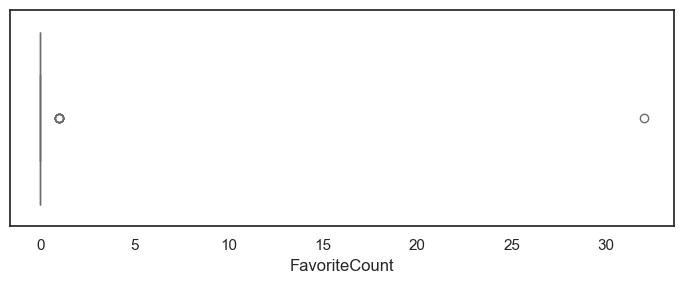

In [81]:
# Visualisation des outliers de FavoriteCount
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='FavoriteCount')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

In [82]:
#Je supprime la colonne FavoriteCount car elle a une médiane de 0 donc elle ne nous sera pas utile
df.drop('FavoriteCount', axis=1, inplace=True)

In [83]:
df.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'AnswerCount'], dtype='object')

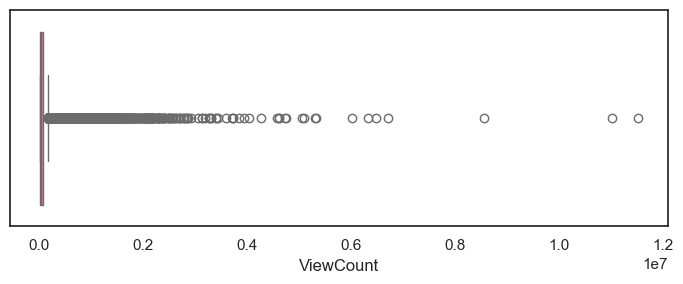

In [84]:
# Visualisation des outliers de ViewCount
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='ViewCount')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

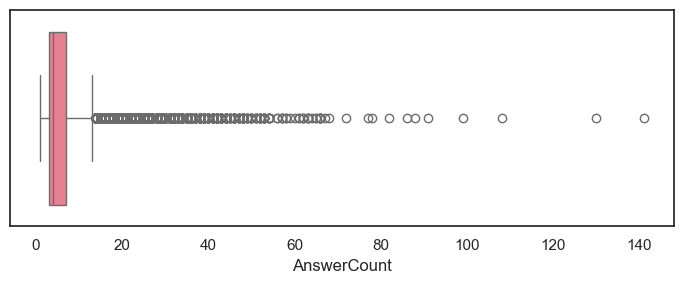

In [85]:
# Visualisation des outliers de AnswerCount
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='AnswerCount')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

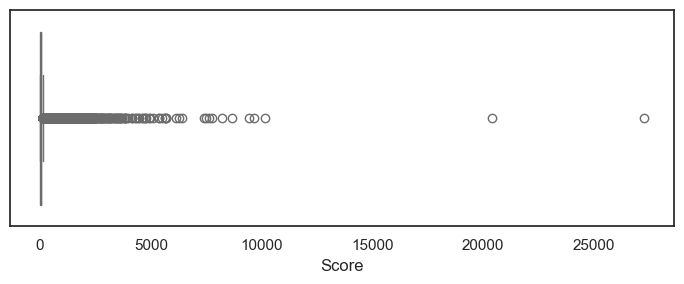

In [86]:
# Visualisation des outliers de la variable Score
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='Score')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

## Histogramme

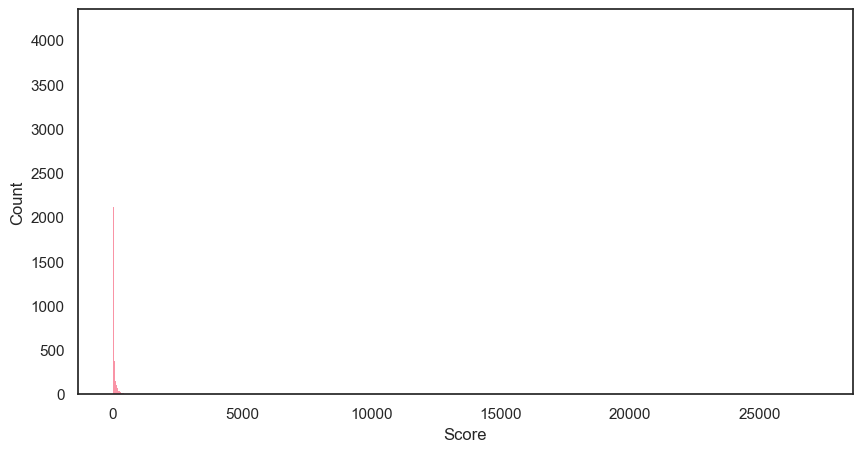

<Figure size 640x480 with 0 Axes>

In [87]:
# Visualisation de l'histogramme de la variable Score
plt.figure(figsize=(10, 5))
sns.set(style="white", palette="husl")
sns.histplot(data=df, x='Score')
plt.show()

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("hist.png")

## WordCloud

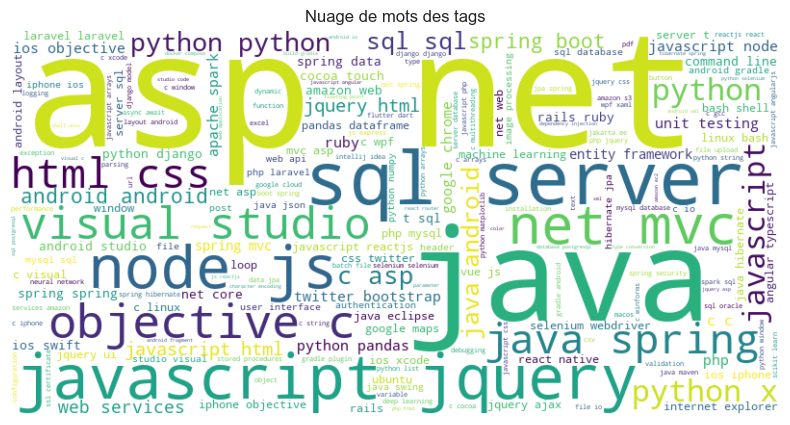

In [88]:
# WordCloud de la variable Tags
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Tags'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()

In [89]:
for index, vect in df.iterrows():
  print(vect['Tags'])

<git><version-control><git-branch><git-push><git-remote>
<linux><text><grep><directory><find>
<git><version-control><overwrite><git-pull><git-fetch>
<php><string><substring><contains><string-matching>
<python><pandas><replace><dataframe><rename>
<javascript><jquery><cors><postman><same-origin-policy>
<git><repository><git-branch><git-push><git-remote>
<sql><sql-server><t-sql><sql-update><dml>
<javascript><arrays><loops><foreach><iteration>
<mysql><database><import><command-line><dump>
<bash><shell><syntax><concatenation><string-concatenation>
<python><shell><terminal><subprocess><command>
<python><parsing><floating-point><type-conversion><integer>
<python><namespaces><program-entry-point><python-module><idioms>
<sql><sql-server><t-sql><if-statement><case>
<git><git-commit><git-clone><git-add><git-refspec>
<json><rest><spring-mvc><curl><http-headers>
<python><pandas><dataframe><select><indexing>
<python><pandas><dataframe><types><casting>
<javascript><jquery><checkbox><selected><checked

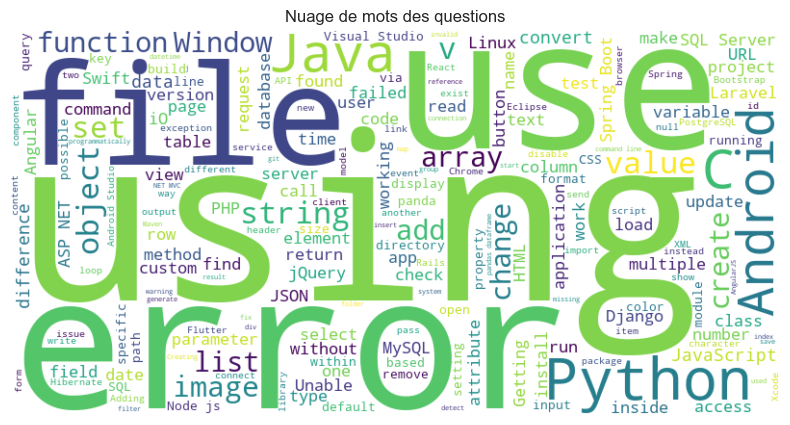

In [90]:
# WordCloud de la variable Title
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Title'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des questions')
plt.show()

In [91]:
for index, vect in df.head(5).iterrows():
  print(vect['Title'])

How do I delete a Git branch locally and remotely?
Find all files containing a specific text (string) on Linux?
How do I force "git pull" to overwrite local files?
How do I check if a string contains a specific word?
Renaming column names in Pandas


In [92]:
for index, vect in df.head(5).iterrows():
  print(vect['Body'])

<p>Failed Attempts to Delete a Remote Branch:</p>
<pre class="lang-bash prettyprint-override"><code>$ git branch -d remotes/origin/bugfix
error: branch 'remotes/origin/bugfix' not found.

$ git branch -d origin/bugfix
error: branch 'origin/bugfix' not found.

$ git branch -rd origin/bugfix
Deleted remote branch origin/bugfix (was 2a14ef7).

$ git push
Everything up-to-date

$ git pull
From github.com:gituser/gitproject

* [new branch] bugfix -&gt; origin/bugfix
Already up-to-date.
</code></pre>
<p>How do I properly delete the <code>remotes/origin/bugfix</code> branch both locally and remotely?</p>

<p>How do I find all files containing a specific string of text within their file contents?</p>
<p>The following doesn't work. It seems to display every single file in the system.</p>
<pre class="lang-none prettyprint-override"><code>find / -type f -exec grep -H 'text-to-find-here' {} \;
</code></pre>

<p>How do I force an overwrite of local files on a <code>git pull</code>? My local reposit

# Partie 3 : Analyse textuelle


In [93]:
doc = df.Title
doc.head()

0    How do I delete a Git branch locally and remot...
1    Find all files containing a specific text (str...
2    How do I force "git pull" to overwrite local f...
3    How do I check if a string contains a specific...
4                      Renaming column names in Pandas
Name: Title, dtype: object

In [94]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/randaalsabbagh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [95]:
# Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize

# Séparer par mot (tableaux de mots)
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('_', ' ').replace("'", ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '_', 'how', 'are', "can't", 'en', 'has', 'in', 'pas']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2
 
# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                      #and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    # sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df['sentence_bow'] = df['Title'].apply(lambda x : transform_bow_fct(x))
df['sentence_bow_lem'] = df['Title'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['Title'].apply(lambda x : transform_dl_fct(x))
df.shape
df.head()

Title  \
0  How do I delete a Git branch locally and remot...   
1  Find all files containing a specific text (str...   
2  How do I force "git pull" to overwrite local f...   
3  How do I check if a string contains a specific...   
4                    Renaming column names in Pandas   

                                                Body  \
0  <p>Failed Attempts to Delete a Remote Branch:<...   
1  <p>How do I find all files containing a specif...   
2  <p>How do I force an overwrite of local files ...   
3  <p>Consider:</p>\n\n<pre><code>$a = 'How are y...   
4  <p>I want to change the column labels of a Pan...   

                                                Tags        Id  Score  \
0  <git><version-control><git-branch><git-push><g...   2003505  20378   
1               <linux><text><grep><directory><find>  16956810   7501   
2  <git><version-control><overwrite><git-pull><gi...   1125968   9662   
3  <php><string><substring><contains><string-matc...   4366730   2655   
4       <python><pandas><replace><dataframe><rename>  11346283   2974   

   ViewCount  AnswerCount                                      sentence_bow  \
0   11525076           41            how delete git branch locally remotely   
1   11034477           56  find files containing specific text string linux   
2    8559695           54          how force git pull overwrite local files   
3    6713692           36           how check string contains specific word   
4    6485201           33                      renaming column names pandas   

                                  sentence_bow_lem  \
0           how delete git branch locally remotely   
1  find file containing specific text string linux   
2          how force git pull overwrite local file   
3          how check string contains specific word   
4                       renaming column name panda   

                                         sentence_dl  
0  how do i delete a git branch locally and remot...  
1  find all files containing a specific text ( st...  
2  how do i force `` git pull '' to overwrite loc...  
3  how do i check if a string contains a specific...  
4                    renaming column names in pandas

In [96]:
# Enregistrer le DataFrame en CSV
df.to_csv('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/df_tok.csv', index=False)

In [97]:
df['sentence_bow'].head()

0              how delete git branch locally remotely
1    find files containing specific text string linux
2            how force git pull overwrite local files
3             how check string contains specific word
4                        renaming column names pandas
Name: sentence_bow, dtype: object

In [98]:
transform_bow_fct(text) 

'how delete git branch locally remotely find files containing specific text string linux how force git pull overwrite local files how check string contains specific word renaming column names pandas why javascript code receive access control allow origin header present requested resource error postman how push new local branch remote git repository track how update select sql server loop array javascript how import sql file using command line mysql how concatenate string variables bash how execute program call system command how parse string float int what name main how perform ... then sql select message src refspec master match pushing commits git how post json data curl selecting multiple columns pandas dataframe change column type pandas setting checked checkbox jquery how create directory missing parent directories how copy files how return date sql server datetime datatype how check array includes value javascript how determine variable undefined null insert ... values select ...

In [99]:
tokenizer_fct('What does if __name__ == "__main__": do?')

['What', 'does', 'if', 'name', '==', '``', 'main', '``', ':', 'do', '?']

In [100]:
df.to_csv("data_titres.csv")

In [101]:
df =  pd.read_csv("data_titres.csv")
print(df.shape)

(50000, 11)


In [102]:
df['length_bow'] = df['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df['length_bow'].max())
df['length_bow_lem'] = df['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", df['length_bow_lem'].max())
df['length_dl'] = df['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df['length_dl'].max())

max length bow :  19
max length bow lem :  19
max length dl :  47


# Partie 4 : Extraction de caractéristiques

## Bag-of-words (bow)

On va transformer le vecteur corpus qui contient des chaînes de caractères en une matrice d’entiers.

La matrice contient autant de colonnes que de mots possibles dans le corpus.

On compte le nombre d’occurrences du mot dans chaque question.

In [103]:
df = df.sample(5000)

In [104]:
# création du bag of words (CountVectorizer et Tf-idf)
from sklearn.feature_extraction.text import CountVectorizer
def color(val):
    color = 'blue' if val > 0 else ''
    return 'background-color: %s' % color

cv = CountVectorizer()
feat = 'sentence_bow_lem'
cv_transform = cv.fit_transform(df[feat])
cv_feature_names = cv.get_feature_names_out()
print('Term Frequency of Document')
dfcv = pd.DataFrame(cv_transform.toarray(), columns = cv_feature_names) / len(cv_feature_names)
dfcv.style.set_caption("Term Frequency of Document")
dfcv.style.applymap(color)
dfcv.head()

Term Frequency of Document


00  000  000z  00323  00928  0308010c   04  04044   05  0500  ...  zero  \
0  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
1  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
2  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
3  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
4  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   

   zip  zmq  zmqerror  zone  zoneddatetime  zoom  zoomable  zxing  сocoapods  
0  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
1  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
2  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
3  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
4  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  

[5 rows x 5392 columns]

In [105]:
dfcv.columns

Index(['00', '000', '000z', '00323', '00928', '0308010c', '04', '04044', '05',
       '0500',
       ...
       'zero', 'zip', 'zmq', 'zmqerror', 'zone', 'zoneddatetime', 'zoom',
       'zoomable', 'zxing', 'сocoapods'],
      dtype='object', length=5392)

In [106]:
# pourcentage de valeurs # 0
full_dense = cv_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 0.114 %


## TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
feat = 'sentence_bow_lem'
tf_transform = tf.fit_transform(df[feat])
tf_feature_names = tf.get_feature_names_out()
print('Term Frequency - Inverse Document Frequency of Document')
dftf = pd.DataFrame(tf_transform.toarray(), columns = tf_feature_names) / len(tf_feature_names)
dftf.style.set_caption("Term Frequency of Document")
dftf.style.applymap(color)
dftf.head()

Term Frequency - Inverse Document Frequency of Document


00  000  000z  00323  00928  0308010c   04  04044   05  0500  ...  zero  \
0  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
1  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
2  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
3  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   
4  0.0  0.0   0.0    0.0    0.0       0.0  0.0    0.0  0.0   0.0  ...   0.0   

   zip  zmq  zmqerror  zone  zoneddatetime  zoom  zoomable  zxing  сocoapods  
0  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
1  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
2  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
3  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  
4  0.0  0.0       0.0   0.0            0.0   0.0       0.0    0.0        0.0  

[5 rows x 5392 columns]

In [108]:
tf_feature_names

array(['00', '000', '000z', ..., 'zoomable', 'zxing', 'сocoapods'],
      dtype=object)

In [109]:
dftf.columns

Index(['00', '000', '000z', '00323', '00928', '0308010c', '04', '04044', '05',
       '0500',
       ...
       'zero', 'zip', 'zmq', 'zmqerror', 'zone', 'zoneddatetime', 'zoom',
       'zoomable', 'zxing', 'сocoapods'],
      dtype='object', length=5392)

In [110]:
full_dense = tf_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 0.114 %


# Partie 5 : Méthode non supervisée

## LDA

Latent Dirichlet Allocation : méthode non-supervisée générative

In [111]:
from gensim import corpora

# Creating document-term matrix 
text_list = df[feat].tolist()
print(text_list)
# Créer une liste de listes de mots (tokens) à partir des phrases
documents = [text.split() for text in df[feat]]
dictionary = corpora.Dictionary(documents)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]

# Afficher le dictionnaire et la matrice document-termes
print("Dictionnaire :", dictionary)
for doc, bow in zip(documents[:5], doc_term_matrix[:5]):
    print(f"Phrase : {doc}")
    print(f"Bag of Words : {bow}")
    print()

['getting result dynamic sql variable sql server', 'java modular application module found java intellij', 'uitableview within uiscrollview using autolayout', 'how get data database view page laravel', 'how check object promise', 'what point new string javascript', 'batch update returned unexpected row count update actual row count expected', 'specify date format mvc5 yyyy', 'php mysql xampp password phpmyadmin mysql connect different', 'requiredif conditional validation two variable mvc4', 'invalid write size valgrind string array', 'how use firstordefaultasync async await web api', 'how get entire xml string xmldocument returned jquery cross browser', 'how setup convolution lstm kera', 'what sstable', 'how install package using stack', 'asp.net mvc viewbag list anonymous class throw error count method', 'add space owl carousel item', 'correctly reading text window 1252 cp1252 file python', 'generate sequence character', 'display dynamic image database remote source graphicimage stream

In [112]:
from gensim.models import LdaModel
import gensim
from gensim import corpora
  
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel


# LDA model
# chunksize détermine le nombre de documents à traiter en une seule fois (ou en un seul "chunk")
# passes indique le nombre de fois que l'algorithme doit passer sur l'ensemble complet des documents
# iterations détermine le nombre d'itérations à effectuer pour chaque passe.
lda = LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary, random_state=0, chunksize=1000, passes=10, iterations=100)

# affiche les num_topics (10 ici) sujets les plus importants, en montrant les num_words (3 ici) mots les plus significatifs 
# pour chaque sujet. Cela donne un aperçu rapide des principaux thèmes détectés par le modèle  
print("3 mots les plus significatifs pour chaque topic:")
print(lda.print_topics(num_topics=10, num_words=3))
print("\n")

# Récupère les num_topics (10) sujets les plus importants, en montrant les num_words (10) mots les plus significatifs 
# pour chaque sujet. Le paramètre formatted=False renvoie les résultats sous forme de liste de tuples 
# plutôt que de chaîne de caractères formatée, ce qui est utile pour une manipulation ultérieure.
topics = lda.show_topics(num_topics=10, num_words=10, formatted=False)

# Pour chaque sujet, récupère l'index du sujet (topic_idx) et la liste des mots associés (topic)
# Chaque "Topic" affiché montre les mots les plus représentatifs pour ce sujet, 
# donnant un aperçu des thèmes principaux détectés par le modèle dans votre corpus de documents
for topic_idx, topic in topics:
    print(f"Topic {topic_idx}:")
    words = ", ".join([word for word, _ in topic])
    print(words)
    print()

3 mots les plus significatifs pour chaque topic:
[(0, '0.072*"how" + 0.015*"django" + 0.015*"work"'), (1, '0.024*"how" + 0.023*"column" + 0.020*"html"'), (2, '0.034*"how" + 0.020*"io" + 0.020*"way"'), (3, '0.022*"what" + 0.021*"list" + 0.020*"how"'), (4, '0.037*"how" + 0.032*"window" + 0.025*"error"'), (5, '0.033*"spring" + 0.021*"studio" + 0.020*"convert"'), (6, '0.046*"how" + 0.041*"use" + 0.022*"server"'), (7, '0.039*"how" + 0.024*"python" + 0.023*"using"'), (8, '0.037*"class" + 0.031*"how" + 0.021*"android"'), (9, '0.031*"how" + 0.030*"array" + 0.028*"key"')]


Topic 0:
how, django, work, set, value, parameter, make, table, field, view

Topic 1:
how, column, html, panda, module, python, using, image, run, application

Topic 2:
how, io, way, date, file, get, custom, time, best, character

Topic 3:
what, list, how, file, difference, mysql, java, multiple, docker, one

Topic 4:
how, window, error, command, file, using, install, linux, directory, find

Topic 5:
spring, studio, convert,

In [113]:
# Initialiser une liste pour stocker les données
data = []

# Récupérer les termes et leurs probabilités pour chaque sujet
for topic_idx in range(lda.num_topics):
    topic_terms = lda.get_topic_terms(topicid=topic_idx, topn=10)  # topn peut être ajusté selon les besoins
    for term_id, prob in topic_terms:
        term = dictionary[term_id]
        data.append((topic_idx, term, prob))

# Créer un DataFrame à partir des données
df_lda = pd.DataFrame(data, columns=['Topic', 'Term', 'Probability'])

# Afficher le DataFrame
df_lda.head()

Topic    Term  Probability
0      0     how     0.071788
1      0  django     0.014551
2      0    work     0.014507
3      0     set     0.013853
4      0   value     0.012105

In [114]:
# Supposons que `dictionary` est le dictionnaire de `gensim` créé à partir du corpus
# et que `corpus` est la collection de documents transformés en bag-of-words

# Récupérer les fréquences des termes
term_frequencies = [(term_id, freq) for term_id, freq in dictionary.dfs.items()]
term_frequencies = [(dictionary[term_id], freq) for term_id, freq in term_frequencies]

# Créer un DataFrame à partir des fréquences des termes
df_terms = pd.DataFrame(term_frequencies, columns=['Term', 'Frequency'])

# Trier le DataFrame par fréquence décroissante
df_terms_sorted = df_terms.sort_values(by='Frequency', ascending=False)

# Afficher le DataFrame des termes les plus fréquents
(df_terms_sorted.head(10))  # Afficher les 10 termes les plus fréquents

Term  Frequency
17       how       1265
15     using        392
102     file        288
89     error        247
103   python        214
62       use        209
18       get        201
158    value        166
27      what        164
125  android        162

In [115]:
# Métriques
# calculate perplexity (densité de vraisemblance) : mesure la qualité de la modélisation d'un ensemble de données
print('\Perplexity: ', lda.log_perplexity(doc_term_matrix,
                                                total_docs=10000))  
 
# calculate topics coherence (mesure le degré de similitude sémantique entre les mots à score élevé dans un topic) : mesure de la qualité des topics générés par le modèle
# varie entre 0 et 1 : proche de 1 indique une haute cohérence
coherence_model_lda = CoherenceModel(model=lda,
                                     texts=documents, dictionary=dictionary, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence: ', coherence_lda)

\Perplexity:  -7.786444309463236


/Users/randaalsabbagh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/randaalsabbagh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/randaalsabbagh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/randaalsabbagh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, current

Coherence:  0.40174581157451306


In [116]:
# Visualisation du LDA avec 5 topics 
import pyLDAvis.gensim as gensimvis

vis = gensimvis.prepare(lda, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

### Conclusion: Les termes contenus dans chaque topic ne me permettent pas de spécifier un sujet et lui donner une étiquette. Le résultat Perplexity/Coherence n'est pas mauvais mais l'étiquettage étant le but du projet, ça ne m'aide pas.

# Partie 6 : Méthode Supervisée

## Word2Vec

In [117]:
## Word2Vec
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

In [118]:
tokens = tf_feature_names
len(tokens)

5392

In [119]:
nltk.download('abc')

[nltk_data] Downloading package abc to
[nltk_data]     /Users/randaalsabbagh/nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [120]:
tokens_list = tokens.tolist()
len(tokens_list)

5392

In [121]:
tokens_list[-1]

'сocoapods'

In [122]:
from nltk.corpus import abc
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings('ignore')

#word2vec = gensim.models.Word2Vec(abc.sents())
word2vec = gensim.models.Word2Vec([tokens_list], vector_size=10000, window=5, min_count=1, workers=4)

# Ensure the last token is in the model's vocabulary
if tokens[-1] in word2vec.wv:
    embedding1 = word2vec.wv.most_similar(tokens_list[-1]) # 'zero'

    # Select additional words to form a meaningful dataset for PCA
    words = list(word2vec.wv.index_to_key)[:50]  # First 50 words from the vocab

    # Retrieve the vectors for these words
    X = [word2vec.wv[word] for word in words]

    # Convert the list of vectors to a NumPy array
    X = np.array(X)

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {X}')
print(X.shape)

Word Embeddibng using Word2Vec: 

Most Similar Words => [('restricted', 0.03455814719200134), ('cert', 0.033937420696020126), ('retrofit', 0.03388598933815956), ('assert', 0.03222673386335373), ('xaml', 0.03216399997472763), ('lzo', 0.03190593421459198), ('open', 0.03160320967435837), ('callback', 0.03125401958823204), ('rejection', 0.030978016555309296), ('caching', 0.03065749630331993)] 

Word Vector => [[-5.2974874e-06  2.4257702e-06  5.1079816e-05 ... -6.1905575e-06
   8.2602401e-06  7.2392024e-05]
 [ 3.3462366e-05 -9.1729737e-05  4.6170106e-05 ... -3.6240192e-05
   1.7065988e-05 -3.6750403e-06]
 [-5.6615532e-05  1.4538636e-05 -1.6967011e-05 ... -4.1055500e-05
  -6.5628315e-05 -2.6911175e-05]
 ...
 [-2.8178252e-05  8.0776241e-05 -9.4074006e-05 ... -4.6555779e-05
   8.9447320e-05  8.2840277e-05]
 [ 8.0220343e-05  2.8353223e-05  4.1418905e-05 ... -8.6208071e-05
  -1.8264096e-05 -2.6175594e-05]
 [-4.3386008e-05 -6.6536275e-05  4.7701702e-05 ... -3.4644807e-05
   8.4745210e-05  6.27347

In [123]:
len(words)

50

### PCA


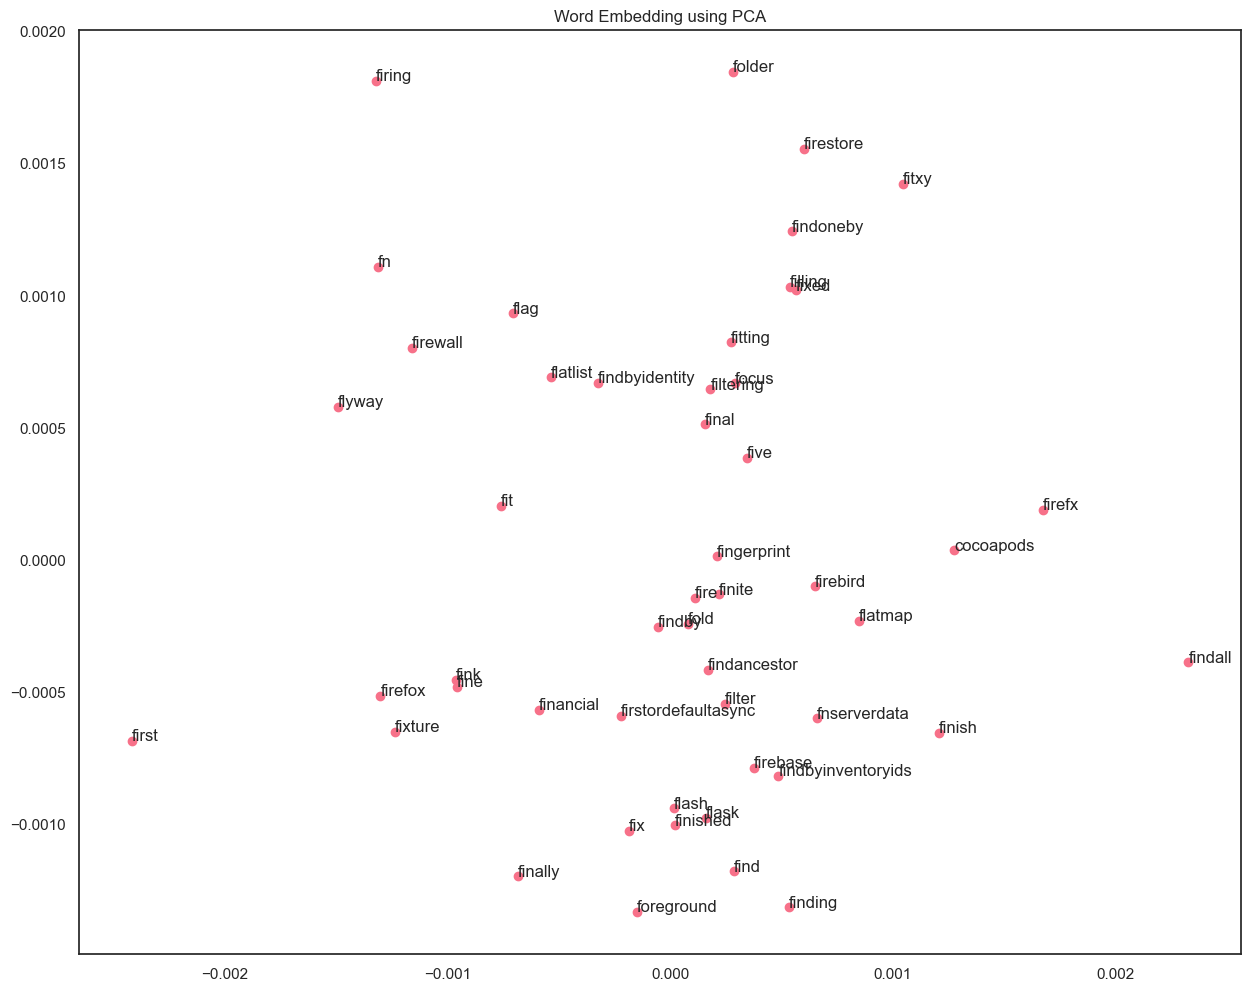

In [124]:
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

plt.figure(figsize = (15, 12))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

In [125]:
y = df.Tags
y.head()

4201     <sql><sql-server><sql-server-2005><t-sql><dyna...
44768     <java><intellij-idea><javafx><module><javafx-11>
28041    <ios><uitableview><uiscrollview><autolayout><n...
7655               <php><mysql><laravel><laravel-5><fetch>
2959       <javascript><promise><q><bluebird><es6-promise>
Name: Tags, dtype: object

In [126]:
tags = [tag[1:len(tag) - 1].split('><') for tag in df['Tags']]
len(tags)

5000

### MultiLabelBinazer

In [127]:
from collections import Counter

# Étape 1: Aplatir la liste des tags pour compter leur fréquence
all_tags = [tag for sublist in tags for tag in sublist]
tag_counts = Counter(all_tags)

# Étape 2: Afficher le nombre total d'étiquettes et leur fréquence
print("Fréquence des étiquettes:")
for tag, count in list(tag_counts.items())[:5]:
    print(f"{tag}: {count}")

# Définir un seuil pour le filtrage des étiquettes
threshold = 0.01 * len(tags)  # Par exemple, 1% des échantillons
print(f"\nSeuil de fréquence pour filtrer les étiquettes: {threshold}")

# Étape 3: Filtrer les étiquettes qui apparaissent moins que le seuil
filtered_tags = [[tag for tag in sublist if tag_counts[tag] >= threshold] for sublist in tags]

# Étape 4: Afficher les étiquettes après filtrage (limité à 5)
print("\nÉtiquettes après filtrage (5 premières lignes):")
for sublist in filtered_tags[:5]:
    print(sublist)

# Étape 5: Initialisation du MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Conversion des labels en matrice binaire
binary_labels = mlb.fit_transform(filtered_tags)

# Affichage des classes identifiées par MultiLabelBinarizer
print("Classes (5 premières):", mlb.classes_[:5])

# Affichage de la matrice binaire résultante
print("Matrice binaire:")
print(binary_labels[:5])

Fréquence des étiquettes:
sql: 201
sql-server: 119
sql-server-2005: 24
t-sql: 41
dynamic-sql: 3

Seuil de fréquence pour filtrer les étiquettes: 50.0

Étiquettes après filtrage (5 premières lignes):
['sql', 'sql-server']
['java']
['ios']
['php', 'mysql', 'laravel']
['javascript']
Classes (5 premières): ['ajax' 'android' 'angular' 'angularjs' 'arrays']
Matrice binaire:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [128]:
#word2vec = gensim.models.Word2Vec(abc.sents())
word2vec = gensim.models.Word2Vec([tokens_list], vector_size=100, window=5, min_count=1, workers=4)

# Ensure the last token is in the model's vocabulary
if tokens[-1] in word2vec.wv:
    embedding1 = word2vec.wv.most_similar(tokens_list[-1]) # 'zero'

    # Select additional words to form a meaningful dataset for PCA
    words = list(word2vec.wv.index_to_key)[:5000]  # First 50 words from the vocab

    # Retrieve the vectors for these words
    X = [word2vec.wv[word] for word in words]

    # Convert the list of vectors to a NumPy array
    X = np.array(X)

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1[:1]} \n\nWord Vector => {X[:5]}')
print(X.shape)

Word Embeddibng using Word2Vec: 

Most Similar Words => [('eigen', 0.35964930057525635)] 

Word Vector => [[-5.3398061e-04  2.3321400e-04  5.0805053e-03  9.0238163e-03
  -9.3099745e-03 -7.1035349e-03  6.4514261e-03  8.9799603e-03
  -5.0049173e-03 -3.7670177e-03  7.3931455e-03 -1.5525462e-03
  -4.5454809e-03  6.5492289e-03 -4.8740041e-03 -1.8123672e-03
   2.8902693e-03  9.8748086e-04 -8.2988618e-03 -9.4405534e-03
   7.3154829e-03  5.0773369e-03  6.7932718e-03  7.6791208e-04
   6.3663037e-03 -3.3945681e-03 -9.3601330e-04  5.7773227e-03
  -7.5218105e-03 -3.9374554e-03 -7.5084101e-03 -9.2697662e-04
   9.5490022e-03 -7.3133833e-03 -2.3443224e-03 -1.9282900e-03
   8.0779903e-03 -5.9388154e-03  2.7482847e-05 -4.7718962e-03
  -9.6123898e-03  5.0185695e-03 -8.7785227e-03 -4.3929736e-03
  -4.9108974e-05 -2.8544856e-04 -7.6829484e-03  9.6189240e-03
   4.9811788e-03  9.2368713e-03 -8.1607001e-03  4.5035896e-03
  -4.1390671e-03  8.2415168e-04  8.5174069e-03 -4.4580395e-03
   4.5242799e-03 -6.793207

## Entraînement du modèle

In [129]:
train_title, test_title, train_labels, test_labels = train_test_split(dftf, binary_labels, test_size=0.2, random_state=42)
print("X_train shape : {}".format(train_title.shape))
print("X_test shape : {}".format(test_title.shape))
print("y_train shape : {}".format(train_labels.shape))
print("y_test shape : {}".format(test_labels.shape))

X_train shape : (4000, 5392)
X_test shape : (1000, 5392)
y_train shape : (4000, 59)
y_test shape : (1000, 59)


In [130]:
def metrics_score(model, df, y_true, y_pred):
    """Compilation function of metrics specific to multi-label
    classification problems in a Pandas DataFrame.
    This dataFrame will have 1 row per metric
    and 1 column per model tested.

    Exemples de Metriques
    ----------------------------------------
    coverage_error = 3 : En moyenne, il faut inclure trois prédictions pour capturer toutes les étiquettes pertinentes pour chaque instance.
    label_ranking_average_precision_score = 0.85 : La précision moyenne des classements est de 85%. Cela signifie que la majorité des étiquettes pertinentes sont bien classées en haut.
    label_ranking_loss = 0.1 : Il y a 10% d'inversions dans les classements où les étiquettes non pertinentes sont classées avant les étiquettes pertinentes.

    Parameters
    ----------------------------------------
    model : string
        Name of the tested model
    df : DataFrame
        DataFrame to extend.
        If None : Create DataFrame.
    y_true : array
        Array of true values to test
    y_pred : array
        Array of predicted values to test
    ----------------------------------------
    """
    if(df is not None):
        df_results = df
    else:
        df_results = pd.DataFrame(index=["coverage_error", "label_ranking_average_precision_score",
                                       "label_ranking_loss"],
                               columns=[model])

    scores = []
    scores.append(coverage_error(y_true,
                                         y_pred))
    scores.append(label_ranking_average_precision_score(y_pred,
                                   y_true))
    scores.append(label_ranking_loss(y_true,
                                       y_pred))

    df_results[model] = scores

    return df_results

In [131]:
classifier = OneVsRestClassifier(GradientBoostingClassifier(random_state=42), n_jobs=-1) # Modèle multi-étiquettes

# Entraîner le modèle sur les données d'entraînement
classifier.fit(train_title, train_labels)

# Prédictions
pred_labels = classifier.predict(test_title)

# Inverse transform des prédictions
test_labels_pred_inversed_optimized = mlb.inverse_transform(pred_labels)
test_labels_inversed = mlb.inverse_transform(test_labels)

# Évaluer les performances avec le modèle optimisé
print("Les 10 premiers tags prédits avec le modèle optimisé - vrais tags :")
print("Prédits:", test_labels_pred_inversed_optimized[0:10])
print("Vrais:", test_labels_inversed[0:10])


df_metrics_compare_gb = metrics_score("Gradient Boosting Classifier",
                                   df=None,
                                   y_true = test_labels,
                                   y_pred = pred_labels)
df_metrics_compare_gb

Les 10 premiers tags prédits avec le modèle optimisé - vrais tags :
Prédits: [('android', 'java'), ('django',), ('ios',), ('iphone', 'objective-c'), ('dataframe', 'pandas', 'python'), ('sql',), ('hibernate', 'java', 'spring'), ('postgresql', 'sql'), ('ajax', 'android', 'image'), ('bash', 'cocoa-touch', 'linux', 'shell')]
Vrais: [('android', 'java'), ('django', 'javascript'), ('ios', 'objective-c', 'swift'), ('ios',), ('dataframe', 'numpy', 'pandas', 'python'), ('c#', 'sql', 'sql-server'), ('jpa', 'spring'), ('mysql', 'sql'), ('android',), ('bash', 'linux', 'shell')]


Gradient Boosting Classifier
coverage_error                                            39.014000
label_ranking_average_precision_score                      0.690426
label_ranking_loss                                         0.528741

In [132]:
import joblib
# Enregistrer le modèle
with open('classifier.joblib', 'wb') as file:
    joblib.dump(classifier, file)

with open('tfidf.joblib', 'wb') as file1:
    joblib.dump(tf, file1)

with open('mlb.joblib', 'wb') as file2:
    joblib.dump(mlb, file2)